In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

# Set the size of plots to a large size
plt.rcParams["figure.figsize"] = (20,10)

Populating the interactive namespace from numpy and matplotlib


# Linear Regression

> Contributors: Eric Keränen, Samuel Aitamaa & Teemu Luhtanen

In this assignment, we analyse numerical data on wine properties.

We chose the red wines dataset for our study. We analyse the wine alcohol content trait.

Our task is to build a regression model that predicts the values of our chosen response
variable as well as possible.

## Part I

What is the regression equation for estimating our chosen trait values? 

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


There are no missing values.

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Only <code>quality</code> is <code>int64</code>, which we change to <code>float64</code> just to be sure.

In [4]:
# We can see that only quality is of type int64, so we change only that
df["quality"] = df["quality"].astype(dtype = "float64")

In [5]:
# Extract data into labels and features
labels = df["alcohol"]
features = df.drop("alcohol", axis = 1)

features.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,6.0


Above we can see the data. We can see a lot of fluctuation between column values, which are hard to compare. Scaling should come in handy.

In [6]:
# Get column names
colnames = features.columns

# Scale data
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns = colnames)

features.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.787823
1598,-1.332702,-1.216849,1.021999,0.752894,-0.434990,0.203223,-0.135861,-0.666057,0.511130,0.010924,0.450848


Scaled data makes it much more easy to compare data between columns.

<AxesSubplot:>

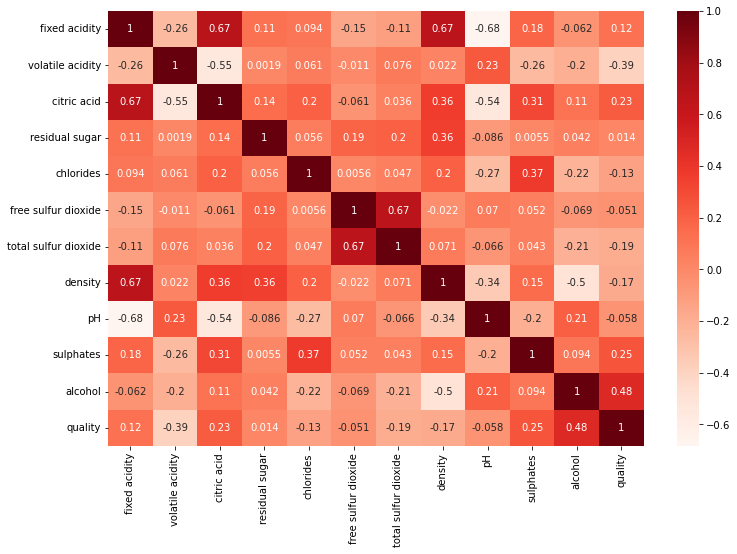

In [7]:
corr = df.corr(method="pearson")
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds", annot=True)

We can see that only density and fixed acidity as well as total sulfur dioxide and free sulfur dioxide correlate somewhat. We decided to not delete any values.

In [8]:
# Split original data into 70 % training data and 30 % test data
train_features, test_features, train_labels, test_labels = split(features, labels, test_size=0.30, train_size=0.70, random_state=0)

Here we also split the data so we can use a test set in Part III.

In [9]:
# Make model and fit it
reg = linear_model.LinearRegression()
reg.fit(train_features, train_labels)

# Get the coefficients and intercept value
print("Coefficients:")
for (index, coef) in enumerate(reg.coef_):
    print (f"{colnames[index]}: {round(coef, 4)}")
print("\nIntercept:", reg.intercept_)

Coefficients:
fixed acidity: 0.8505
volatile acidity: 0.111
citric acid: 0.1465
residual sugar: 0.3599
chlorides: -0.0376
free sulfur dioxide: -0.0569
total sulfur dioxide: -0.0191
density: -1.0846
pH: 0.5676
sulphates: 0.1719
quality: 0.1863

Intercept: 10.402327523586672


From these coefficients and intercept values we can derive the regression equation wiht the following equation:

![https://i.gyazo.com/390fc5d4df3001d1616f0c629695c13c.png](https://i.gyazo.com/390fc5d4df3001d1616f0c629695c13c.png)

Where  
> *y* is the response variable  
> *β* is a coefficient  
> *x* is a explanatory variable  
> *ε* is the intercept value

In [10]:
# Regression equation would be:
# y =
equation = "Alcohol = \n"
pred_equation = 0
for index, coef in enumerate(reg.coef_):
    equation += f"{coef:.4f} * {colnames[index]} + \n"
    # βi * xi +
    pred_equation += coef * train_features[colnames[index]]
equation += f"{reg.intercept_}"
# ε
pred_equation += reg.intercept_

# Print the equation
print(equation)

Alcohol = 
0.8505 * fixed acidity + 
0.1110 * volatile acidity + 
0.1465 * citric acid + 
0.3599 * residual sugar + 
-0.0376 * chlorides + 
-0.0569 * free sulfur dioxide + 
-0.0191 * total sulfur dioxide + 
-1.0846 * density + 
0.5676 * pH + 
0.1719 * sulphates + 
0.1863 * quality + 
10.402327523586672


In [11]:
# Print ten top predictions with the regression equation,
# that will be compared to the predictions from the function
print ("Predictions using regression equation:")
pred_equation = pred_equation.head(10)
print (pred_equation.to_string(index=False))

Predictions using regression equation:
 9.839379
11.723638
 9.469728
11.257890
10.280870
11.397826
10.422279
 9.333363
10.797792
 9.768012


In [12]:
# Print ten top predictions from the function
print ("Predictions using regression model function:")
pred_labels = reg.predict(train_features)
for index, predicted in enumerate(pred_labels):
    if index == 10: break
    print (round(predicted, 6))

Predictions using regression model function:
9.839379
11.723638
9.469728
11.25789
10.28087
11.397826
10.422279
9.333363
10.797792
9.768012


We can see that the regression equation is correct, since it prints the same results as the prediction function form the sklearn regression model.

## Part II

What are the five most useful variables for estimating the trait values?

In [13]:
mostUseful = pd.DataFrame()
mostUseful["column name"] = colnames
mostUseful["coefficient"] = np.abs(reg.coef_)
mostUseful = mostUseful.sort_values('coefficient', ascending = False)
print (mostUseful.head(5))

       column name  coefficient
7          density     1.084620
0    fixed acidity     0.850459
8               pH     0.567598
3   residual sugar     0.359862
10         quality     0.186255


From the table above we can see that **density**, **fixed acidity**, **pH**, **residual sugar** and **quality** (in this order) are the most useful variables in estimating how much alcohol there is in a wine. Some of these values may be negative (like density), but big negative numbers affect the trait values as much as big positive numbers.

## Part III

Provide a validation-based error estimate for your model. As the data set is large, use
split validation that divides the data set into separate training and testing sets. 

As we have already splittted the set into training and testing, lets use them here.

In [14]:
pred_test_labels = reg.predict(test_features)

Evaluating the model using the test set we created in Part I:

In [15]:
mse_test = mean_squared_error(test_labels, pred_test_labels)
r2s_test = r2_score(test_labels, pred_test_labels) 
print("MSE on test set = ", mse_test)
print("R2s on test set = ", r2s_test)
rmse_test = math.sqrt(mse_test)
print("RMSE on test set = ", rmse_test)

mse_train = mean_squared_error(train_labels, pred_labels)
rmse_train = math.sqrt(mse_train)
print("RMSE on train set = ", rmse_train)

MSE on test set =  0.3162761286693083
R2s on test set =  0.7222306986418854
RMSE on test set =  0.5623843247009187
RMSE on train set =  0.6062393869467696


The MSE value is relatively low, which is on the better side, since low values in MSE are good.

The R2s value is also relatively high, which is on the better side, since high values in R2s are good. R2s is always between 0 and 1.

It can be said that [lower RMSE values](https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values) (between 0.2 and 0.5) show that the model can predict the data relatively accurately. We can also see that the RMSE is lower on test set than on the train set and the values don't vary too much from each other. This indicates that the model [is not overfitting](https://www.analyticsvidhya.com/blog/2021/08/performance-comparision-of-regularized-and-unregularized-regression-models/).

<Figure size 1440x720 with 0 Axes>

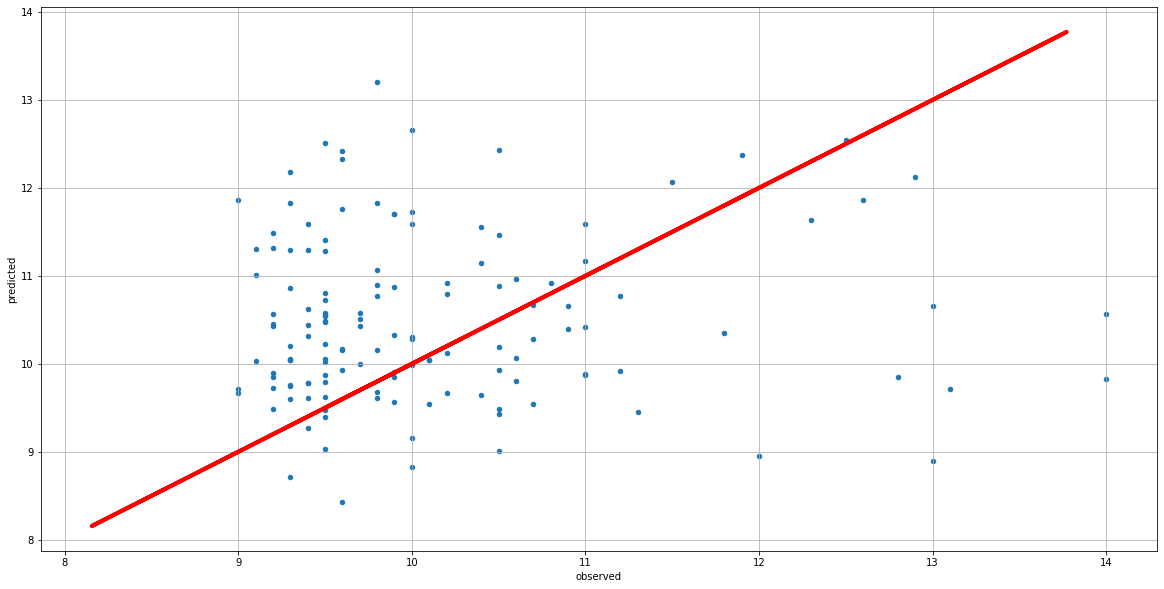

In [16]:
test_df = pd.concat([test_labels, pd.Series(pred_test_labels), pd.Series(test_labels - pred_test_labels)], axis=1)
test_df.columns=["observed", "predicted", "residual"]

plt.figure()
test_df.plot.scatter(x='observed', y='predicted')
plt.plot(pred_test_labels, pred_test_labels, color="red", linewidth=4)
plt.grid()
plt.show()